In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [4]:
# Load the dataset
data = pd.read_csv('/Users/charishyadavali/Desktop/product_info.csv')
data

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [5]:
# Function to calculate sentiment
def analyze_sentiment(text):
    if pd.isna(text):
        return None
    return TextBlob(text).sentiment.polarity

In [6]:
# EDA: Missing values and basic statistics
print("Missing Values:")
print(data.isnull().sum())
print("\nBasic Statistics:")
print(data.describe())

Missing Values:
product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

Basic Statistics:
          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.65559

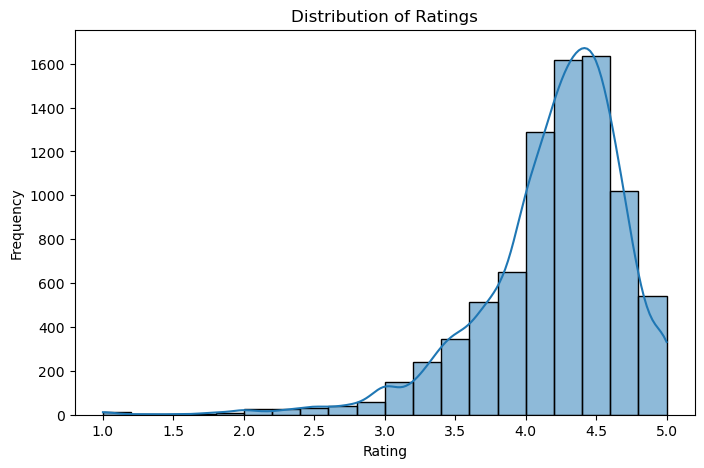

In [7]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

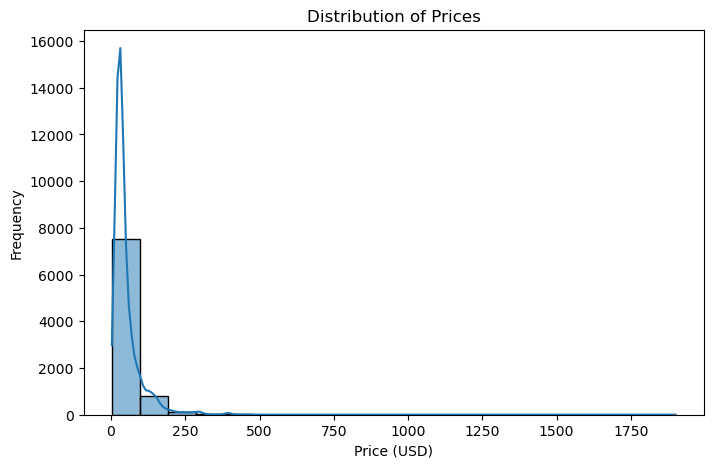

In [8]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['price_usd'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

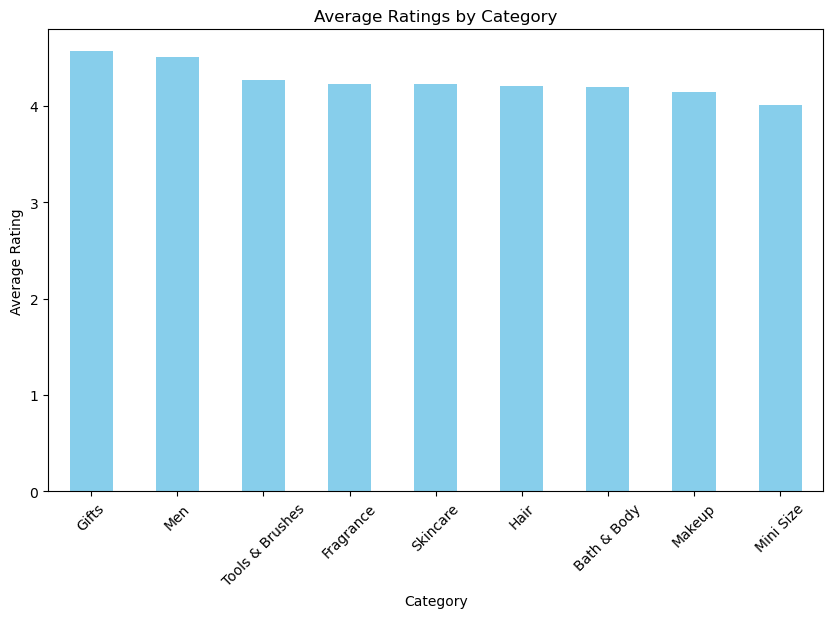

In [9]:
# Ratings by Categories
plt.figure(figsize=(10, 6))
category_ratings = data.groupby('primary_category')['rating'].mean().sort_values(ascending=False)
category_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

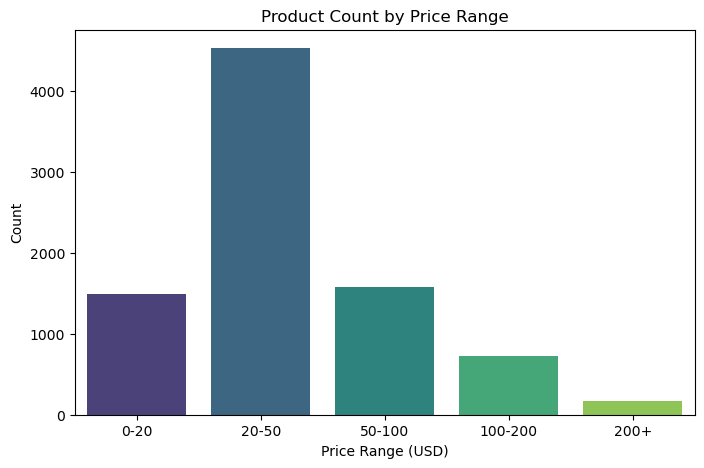

In [10]:
# Count of Products per Price Range
data['price_range'] = pd.cut(data['price_usd'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '20-50', '50-100', '100-200', '200+'])
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=data, palette='viridis')
plt.title('Product Count by Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Count')
plt.show()


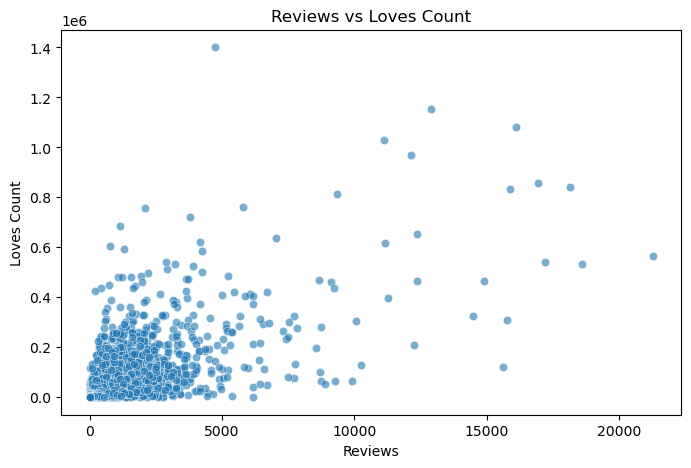

In [11]:
# Relationship Between Reviews and Loves Count
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='reviews', y='loves_count', alpha=0.6)
plt.title('Reviews vs Loves Count')
plt.xlabel('Reviews')
plt.ylabel('Loves Count')
plt.show()


Number of Products In Stock: 7868

Top 5 In Stock Products:
                product_name brand_name  price_usd  rating  reviews
0    Fragrance Discovery Set      19-69       35.0  3.6364     11.0
1    La Habana Eau de Parfum      19-69      195.0  4.1538     13.0
2  Rainbow Bar Eau de Parfum      19-69      195.0  4.2500     16.0
3       Kasbah Eau de Parfum      19-69      195.0  4.4762     21.0
4  Purple Haze Eau de Parfum      19-69      195.0  3.2308     13.0

In Stock Products by Category:
Skincare           2288
Makeup             2155
Hair               1403
Fragrance          1279
Bath & Body         377
Mini Size           257
Men                  55
Tools & Brushes      50
Gifts                 4
Name: primary_category, dtype: int64


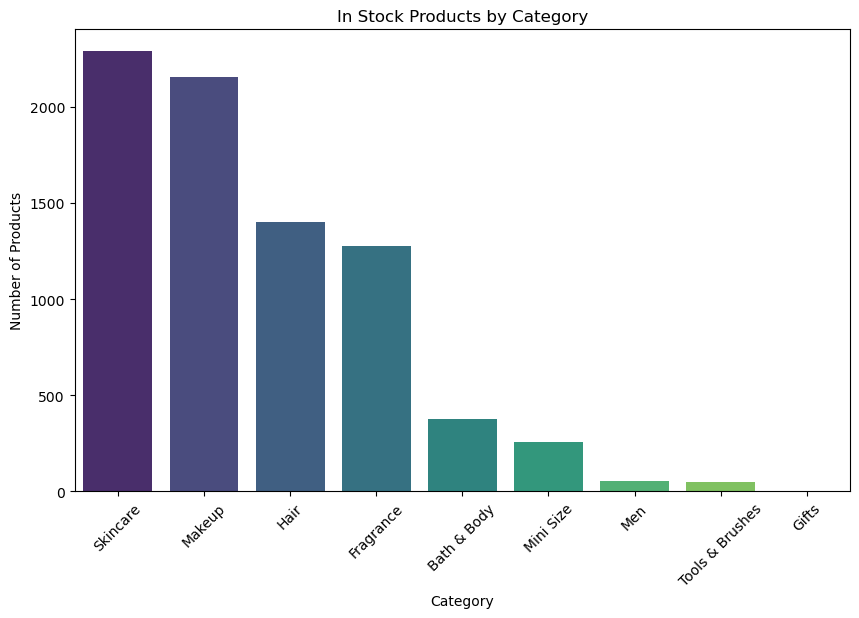

/var/folders/vb/n9bkjp312013zm852k0_5_040000gn/T/ipykernel_50738/2049708336.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_stock['price_range'] = pd.cut(in_stock['price_usd'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '20-50', '50-100', '100-200', '200+'])


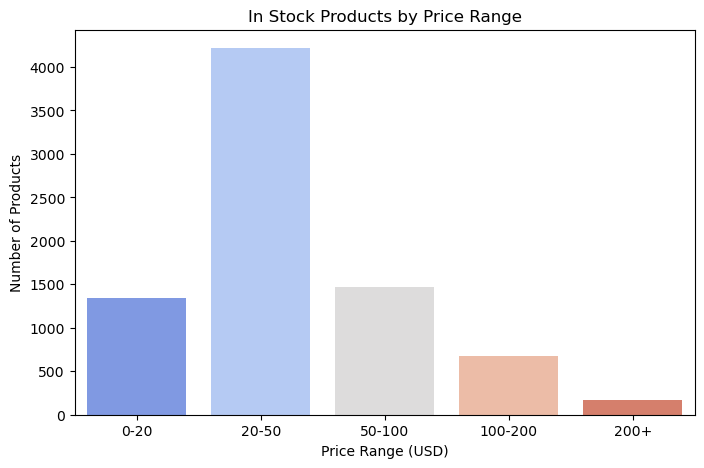

In [12]:
in_stock = data[data['out_of_stock'] == 0]

# Count of in-stock products
print("Number of Products In Stock:", len(in_stock))

# Top 5 in-stock products
top_in_stock = in_stock[['product_name', 'brand_name', 'price_usd', 'rating', 'reviews']].head(5)
print("\nTop 5 In Stock Products:")
print(top_in_stock)

# In-stock products by category
in_stock_by_category = in_stock['primary_category'].value_counts()
print("\nIn Stock Products by Category:")
print(in_stock_by_category)

# Visualization: In-stock products by category
plt.figure(figsize=(10, 6))
sns.barplot(x=in_stock_by_category.index, y=in_stock_by_category.values, palette='viridis')
plt.title('In Stock Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# In-stock products by price range
in_stock['price_range'] = pd.cut(in_stock['price_usd'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '20-50', '50-100', '100-200', '200+'])
in_stock_by_price = in_stock['price_range'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=in_stock_by_price.index, y=in_stock_by_price.values, palette='coolwarm')
plt.title('In Stock Products by Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Number of Products')
plt.show()

Number of Products Out of Stock: 626

Top 5 Out of Stock Products:
                                         product_name      brand_name  \
15                African Beauty Butter Mini Gift Set      54 Thrones   
17  Mini AFRICAN Beauty Butter- Intensive Dry Skin...      54 Thrones   
18                                 ABBOTT Sampler Set          ABBOTT   
25                      The Cape Perfume Travel Spray          ABBOTT   
35                                    Magnolia Nobile  Acqua di Parma   

    price_usd  rating  reviews  
15       29.0  3.5610     41.0  
17       12.0  4.5175    143.0  
18       26.0  4.8163     49.0  
25       29.0  3.8333      6.0  
35      210.0  4.2791     43.0  

Out of Stock Products by Category:
Makeup             214
Fragrance          153
Skincare           132
Hair                61
Mini Size           31
Bath & Body         28
Men                  5
Tools & Brushes      2
Name: primary_category, dtype: int64


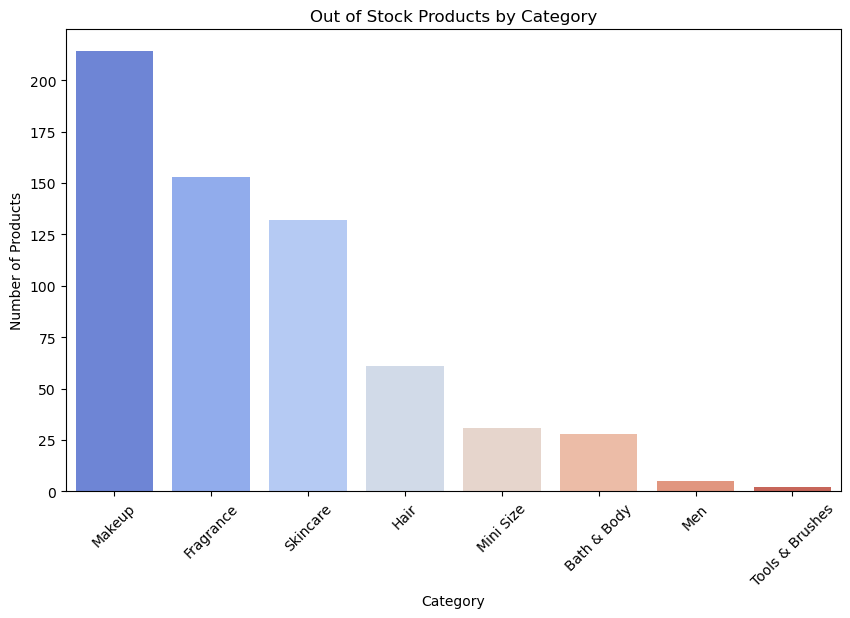

/var/folders/vb/n9bkjp312013zm852k0_5_040000gn/T/ipykernel_50738/1606975988.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_stock['price_range'] = pd.cut(out_of_stock['price_usd'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '20-50', '50-100', '100-200', '200+'])


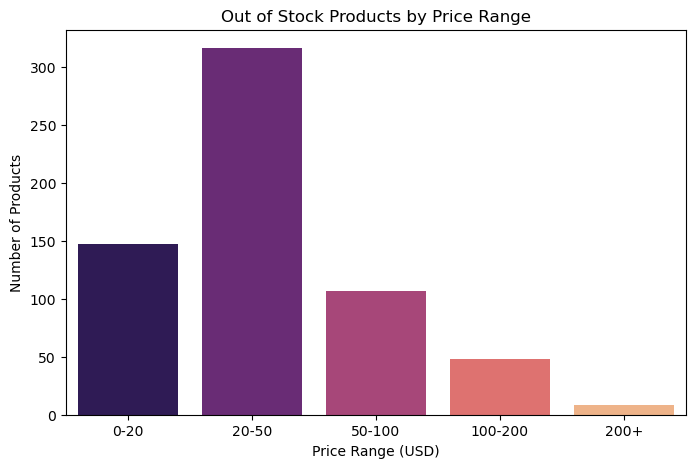

In [13]:
# Filter products out of stock
out_of_stock = data[data['out_of_stock'] == 1]

# Count of out-of-stock products
print("Number of Products Out of Stock:", len(out_of_stock))

# Top 5 out-of-stock products
top_out_of_stock = out_of_stock[['product_name', 'brand_name', 'price_usd', 'rating', 'reviews']].head(5)
print("\nTop 5 Out of Stock Products:")
print(top_out_of_stock)

# Out-of-stock products by category
out_of_stock_by_category = out_of_stock['primary_category'].value_counts()
print("\nOut of Stock Products by Category:")
print(out_of_stock_by_category)

# Visualization: Out-of-stock products by category
plt.figure(figsize=(10, 6))
sns.barplot(x=out_of_stock_by_category.index, y=out_of_stock_by_category.values, palette='coolwarm')
plt.title('Out of Stock Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Out-of-stock products by price range
out_of_stock['price_range'] = pd.cut(out_of_stock['price_usd'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '20-50', '50-100', '100-200', '200+'])
out_of_stock_by_price = out_of_stock['price_range'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=out_of_stock_by_price.index, y=out_of_stock_by_price.values, palette='magma')
plt.title('Out of Stock Products by Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Number of Products')
plt.show()


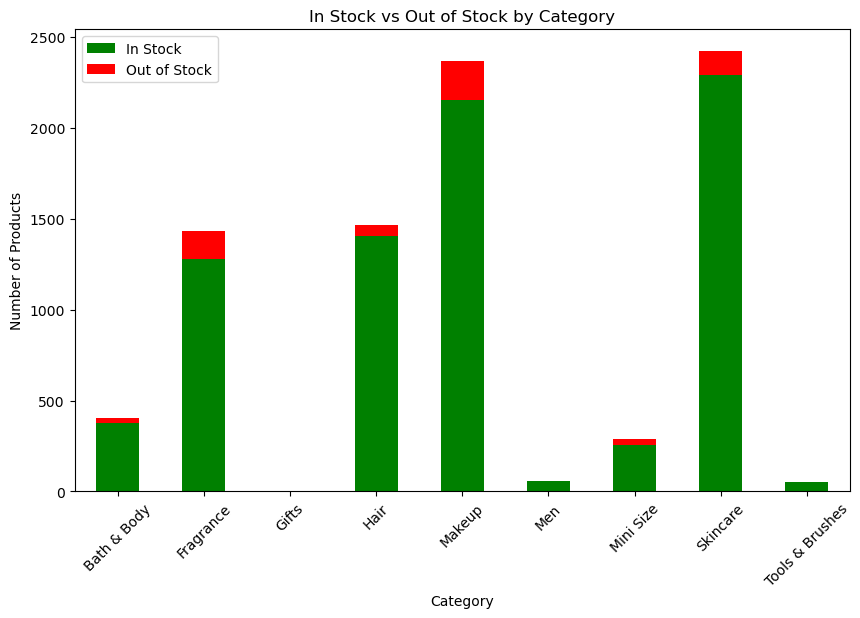

In [14]:
# Products In Stock vs Out of Stock Analysis
in_stock = data[data['out_of_stock'] == 0]
out_of_stock = data[data['out_of_stock'] == 1]
stock_category = data.groupby(['primary_category', 'out_of_stock'])['product_id'].count().unstack()
stock_category.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('In Stock vs Out of Stock by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.legend(['In Stock', 'Out of Stock'])
plt.show()

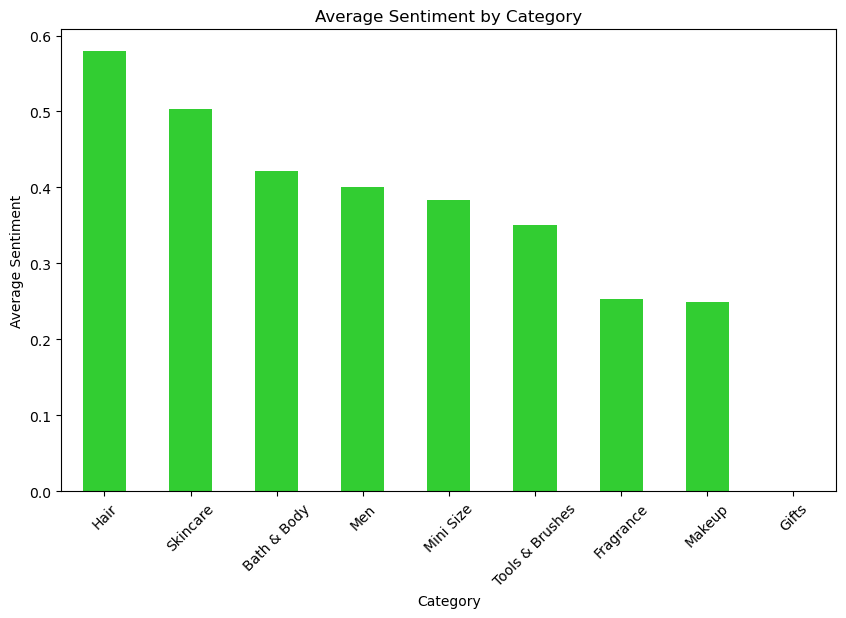

In [15]:
# Sentiment Analysis
data['sentiment'] = data['highlights'].apply(analyze_sentiment)

# Sentiment by Categories
plt.figure(figsize=(10, 6))
sentiment_by_category = data.groupby('primary_category')['sentiment'].mean().sort_values(ascending=False)
sentiment_by_category.plot(kind='bar', color='limegreen')
plt.title('Average Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()

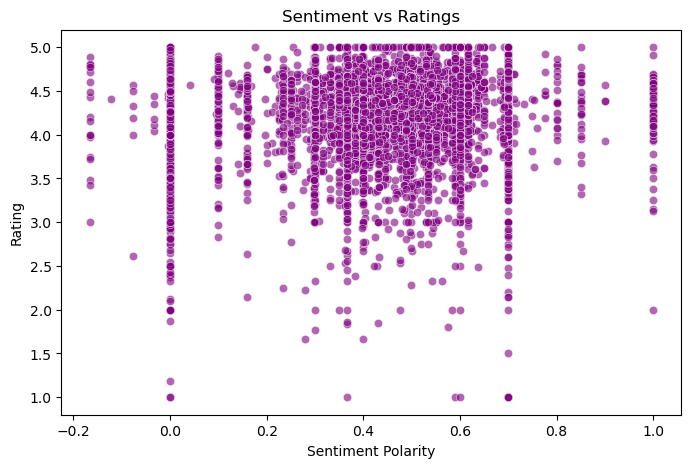

In [16]:
# Correlation Between Sentiment and Ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='sentiment', y='rating', alpha=0.6, color='purple')
plt.title('Sentiment vs Ratings')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.show()


In [17]:
# Top Sentiment Highlights
top_positive = data[['product_name', 'highlights', 'sentiment']].sort_values(by='sentiment', ascending=False).head(5)
top_negative = data[['product_name', 'highlights', 'sentiment']].sort_values(by='sentiment').head(5)

print("\nTop Positive Sentiment Highlights:")
print(top_positive)
print("\nTop Negative Sentiment Highlights:")
print(top_negative)



Top Positive Sentiment Highlights:
                                   product_name  \
5386  Madagascar Vanilla Perfume Oil Rollerball   
8342          Baggage Claim Rose Gold Eye Masks   
563              POWmade Waterproof Brow Pomade   
6806                             Eyelash Curler   
6807              Clear Sunscreen Stick SPF 50+   

                                             highlights  sentiment  
5386  ['allure 2022 Best of Beauty Award Winner', 'W...        1.0  
8342  ['Vegan', 'allure 2020 Best of Beauty Award Wi...        1.0  
563   ['Long-wearing', 'allure 2021 Best of Beauty A...        1.0  
6806  ['Volumizing', 'allure 2018 Best of Beauty Awa...        1.0  
6807  ['Without Phthalates', 'allure 2021 Best of Be...        1.0  

Top Negative Sentiment Highlights:
                              product_name  \
5894          Lip Fetish Sheer Colour Balm   
5898       PERMA PRECISION Liquid Eyeliner   
2521                 Lip Teasers Lip Gloss   
2522                  L

In [18]:
# Encode categorical features
encoder = LabelEncoder()
data['primary_category_encoded'] = encoder.fit_transform(data['primary_category'])

# Handle missing values
data['rating'].fillna(data['rating'].mean(), inplace=True)
data['reviews'].fillna(0, inplace=True)
data['price_usd'].fillna(data['price_usd'].mean(), inplace=True)

# Features and targets
features_regression = ['loves_count', 'reviews', 'price_usd', 'primary_category_encoded']
target_regression = 'rating'

features_classification = ['loves_count', 'reviews', 'price_usd', 'primary_category_encoded']
data['sentiment_label'] = data['sentiment'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification
target_classification = 'sentiment_label'

# Splitting data
X_reg = data[features_regression]
y_reg = data[target_regression]

X_clf = data[features_classification]
y_clf = data[target_classification]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Random Forest Regressor (for Ratings)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)
print("\nRandom Forest Regressor Results:")
print("R² Score:", r2_score(y_test_reg, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_rf))



Random Forest Regressor Results:
R² Score: 0.012788365647947941
Mean Absolute Error: 0.3540680934093771


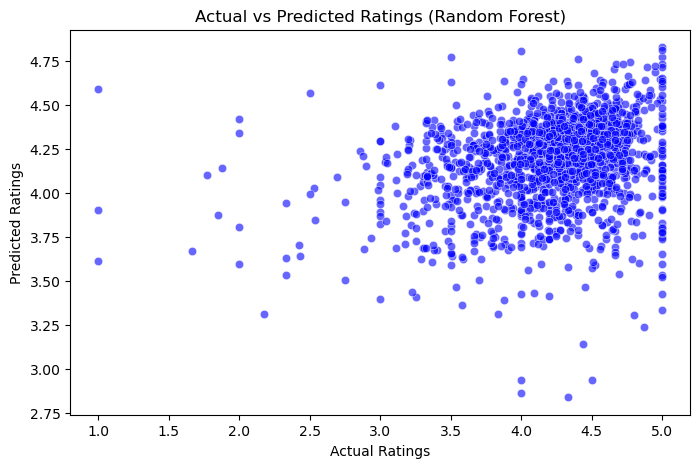

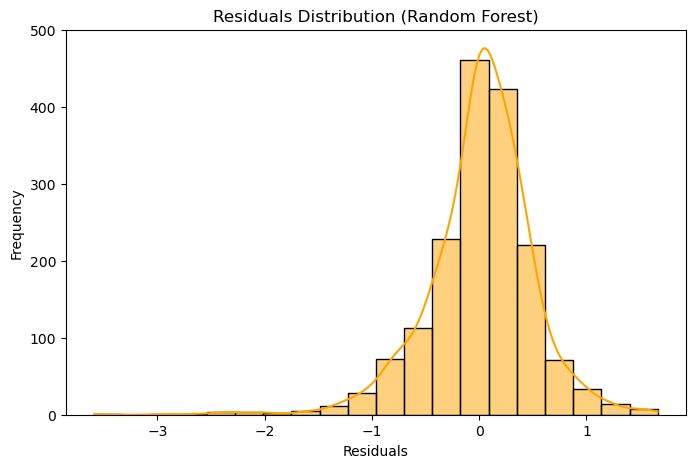

In [19]:

# Visualizing Random Forest Predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_reg, y=y_pred_rf, alpha=0.6, color='blue')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Residual Plot
residuals = y_test_reg - y_pred_rf
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



In [20]:
# Logistic Regression (for Sentiment Classification)
logreg_model = LogisticRegression()
logreg_model.fit(X_train_clf, y_train_clf)
y_pred_clf = logreg_model.predict(X_test_clf)
print("\nLogistic Regression Results:")
print("Accuracy Score:", accuracy_score(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))




Logistic Regression Results:
Accuracy Score: 0.6297822248381401
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20       629
           1       0.64      0.93      0.76      1070

    accuracy                           0.63      1699
   macro avg       0.57      0.53      0.48      1699
weighted avg       0.59      0.63      0.55      1699



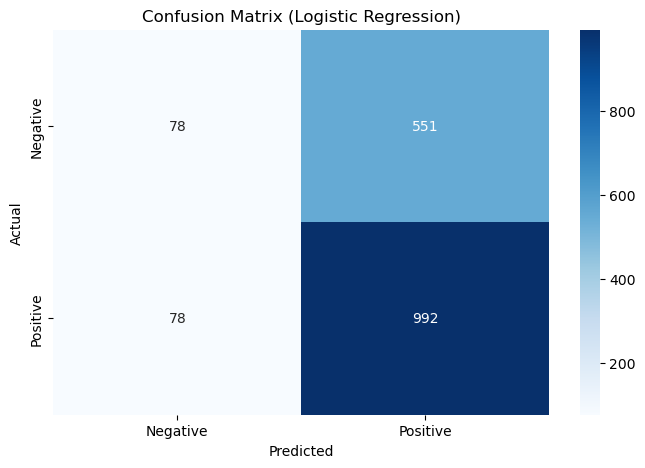

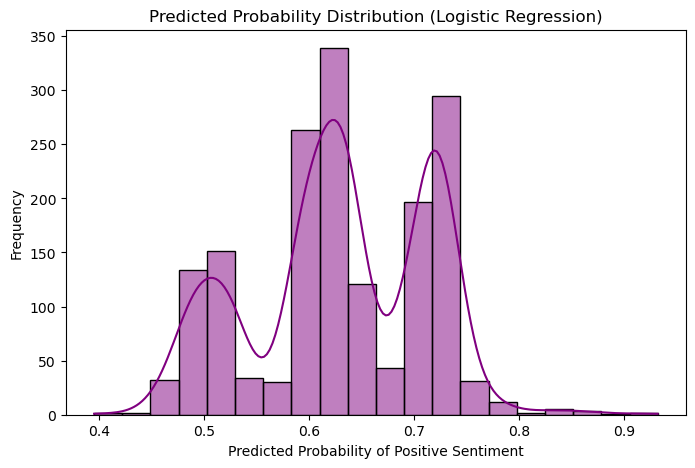

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predicted Probabilities Distribution
y_pred_prob = logreg_model.predict_proba(X_test_clf)[:, 1]
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_prob, bins=20, kde=True, color='purple')
plt.title('Predicted Probability Distribution (Logistic Regression)')
plt.xlabel('Predicted Probability of Positive Sentiment')
plt.ylabel('Frequency')
plt.show()



SVM Results:
Accuracy Score: 0.5968216597998823
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.17      0.24       629
           1       0.63      0.85      0.73      1070

    accuracy                           0.60      1699
   macro avg       0.52      0.51      0.48      1699
weighted avg       0.55      0.60      0.54      1699



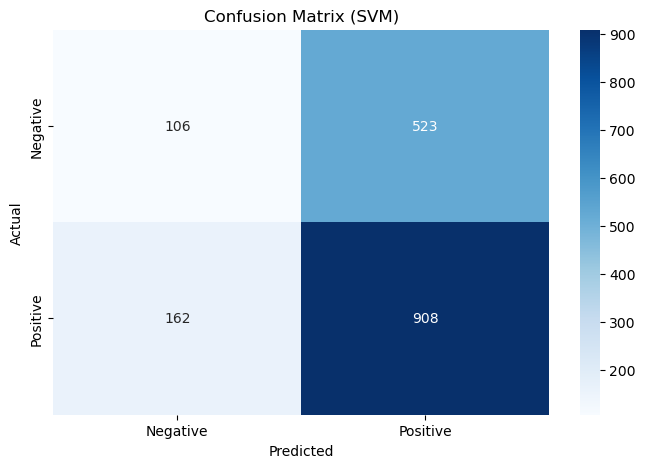

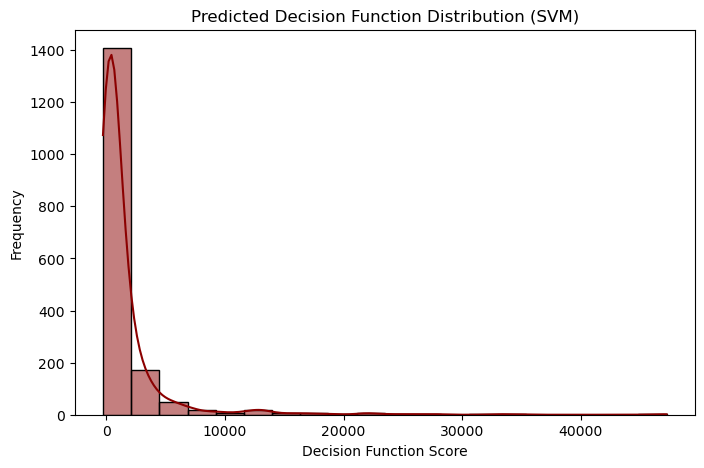

In [25]:

# SVM (Support Vector Machine) for Sentiment Classification
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train_clf, y_train_clf)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_clf)

# Evaluate SVM Model
print("\nSVM Results:")
print("Accuracy Score:", accuracy_score(y_test_clf, y_pred_svm))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_svm))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test_clf, y_pred_svm)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predicted Probabilities Distribution (SVM)
y_pred_prob_svm = svm_model.decision_function(X_test_clf)
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_prob_svm, bins=20, kde=True, color='darkred')
plt.title('Predicted Decision Function Distribution (SVM)')
plt.xlabel('Decision Function Score')
plt.ylabel('Frequency')
plt.show()

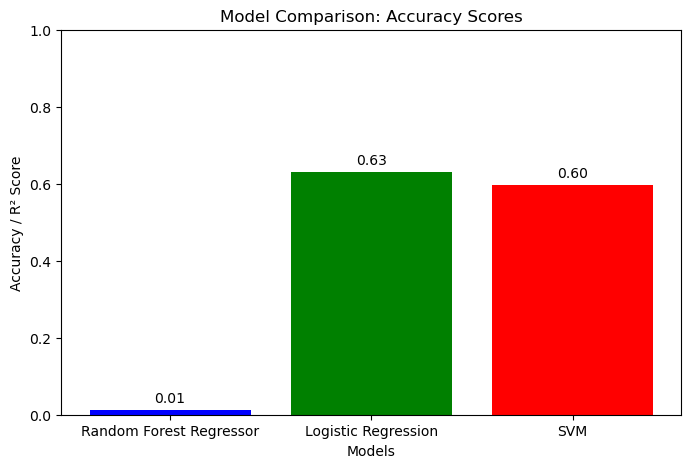

In [26]:
models = ['Random Forest Regressor', 'Logistic Regression', 'SVM']
accuracy_scores = [0.0128, 0.6297, 0.5968]  # Random Forest R² score as approximation, Logistic Regression, SVM Accuracy

# Bar graph for model comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy / R² Score')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()